In [68]:
import pandas as pd
import numpy as np

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
#chenyi's drive path
!cd '/content/drive/MyDrive/AI4Good/Final Project'
!ls '/content/drive/MyDrive/AI4Good/Final Project'

product_data.csv  superstore_data.csv  walmart_cleaned.csv


In [72]:

product = pd.read_csv("/content/drive/MyDrive/AI4Good/Final Project/superstore_data.csv")
product.head(2)

,Title,Price,Package Sizing,Category,Store
0,"Bananas, Bunch",1.75,$1.52/1kg $0.69/1lb,fruit,Superstore
1,Strawberries 1LB,4.99,"454 g, $1.10/100g",fruit,Superstore


In [73]:
# Try extracting with the regular expression
product[['Price Per Kilo', 'Price per Unit']] = product['Package Sizing'].str.extract(r'([\d\.]+/\w+)\s*(\$\d+\.?\d*/\w+)')
product['Quantity'] = None
# For rows where data is missing, split by comma as a fallback
fallback_df = product[product['Price Per Kilo'].isnull() | product['Price per Unit'].isnull()]
for index, row in fallback_df.iterrows():
    if ',' in row['Package Sizing']:
        quantity, price = row['Package Sizing'].split(',', 1)  # Split at the first comma
        product.at[index, 'Quantity'] = quantity.strip()
        product.at[index, 'Price per Unit'] = price.strip()

product.drop('Package Sizing', axis=1, inplace=True)

# Check the DataFrame to ensure the new columns are populated correctly
product.head(10)


,Title,Price,Category,Store,Price Per Kilo,Price per Unit,Quantity
0,"Bananas, Bunch",1.75,fruit,Superstore,1.52/1kg,$0.69/1lb,None
1,Strawberries 1LB,4.99,fruit,Superstore,NaN,$1.10/100g,454 g
2,Red Cherries,5.77,fruit,Superstore,6.48/1kg,$2.94/1lb,None
3,Red Seedless Watermelon,4.94,fruit,Superstore,NaN,$4.94/1ea,1 ea
4,Blueberries 1 pint,4.99,fruit,Superstore,NaN,$1.47/100g,340 g
5,"Avocados Bag, 5-Pack",6.99,fruit,Superstore,NaN,$1.40/1ea,1 ea
6,Strawberries 2LB,8.99,fruit,Superstore,NaN,$0.99/100g,907 g
7,Lemon,0.99,fruit,Superstore,NaN,$0.99/1ea,1 ea
8,Extra Large Green Seedless Grapes,11.89,fruit,Superstore,11.66/1kg,$5.29/1lb,None
9,Limes,0.99,fruit,Superstore,NaN,$0.99/1ea,1 ea


In [74]:
def calculate_quantity(row):
    if pd.isnull(row['Quantity']):  # If Quantity is None, calculate it
        if pd.notnull(row['Price Per Kilo']) and 'kg' in row['Price Per Kilo']:  # Ensure 'kg' is part of the string
            try:
                price_per_kilo = float(row['Price Per Kilo'].split('/')[0])  # Extract numeric part
                calculated_quantity = row['Price'] / price_per_kilo  # Calculate Quantity
                return f"{calculated_quantity:.2f} kg"  # Append 'kg' after formatting
            except (ValueError, TypeError):  # Handle conversion errors
                return None  # If conversion fails, return None
        return None  # If 'Price Per Kilo' is not valid or missing, return None
    return f"{row['Quantity']} kg" if 'kg' not in row['Quantity'] and row['Quantity'].replace('.', '', 1).isdigit() else row['Quantity']
    # Append 'kg' if not already present and if the quantity is numeric

product['Quantity'] = product.apply(calculate_quantity, axis=1)
product

,Title,Price,Category,Store,Price Per Kilo,Price per Unit,Quantity
0,"Bananas, Bunch",1.75,fruit,Superstore,1.52/1kg,$0.69/1lb,1.15 kg
1,Strawberries 1LB,4.99,fruit,Superstore,NaN,$1.10/100g,454 g
2,Red Cherries,5.77,fruit,Superstore,6.48/1kg,$2.94/1lb,0.89 kg
3,Red Seedless Watermelon,4.94,fruit,Superstore,NaN,$4.94/1ea,1 ea
4,Blueberries 1 pint,4.99,fruit,Superstore,NaN,$1.47/100g,340 g
...,...,...,...,...,...,...,...
1353,Golden Yellow Sugar,3.79,bakingEssentials,Superstore,NaN,$0.38/100g,1 kg
1354,Fridge-N-Freezer Baking Soda,2.29,bakingEssentials,Superstore,NaN,$0.46/100g,500 g
1355,Acai Blueberry Cashew Organic,7.99,bakingEssentials,Superstore,NaN,$5.33/100g,150 g
1356,Seedless Thompson Dried Raisins,10.99,bakingEssentials,Superstore,NaN,$0.81/100g,1.36 kg


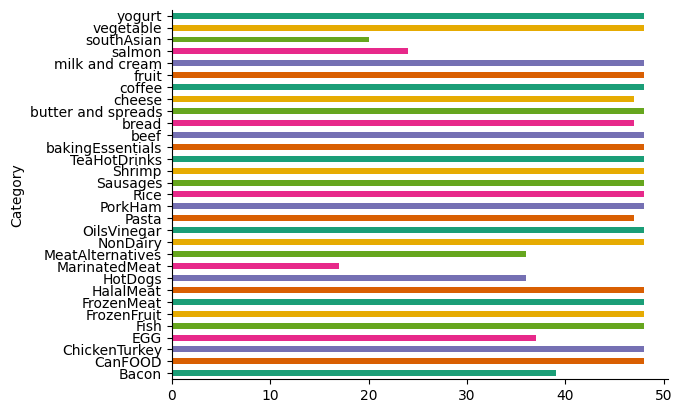

In [75]:
from matplotlib import pyplot as plt
import seaborn as sns
product.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

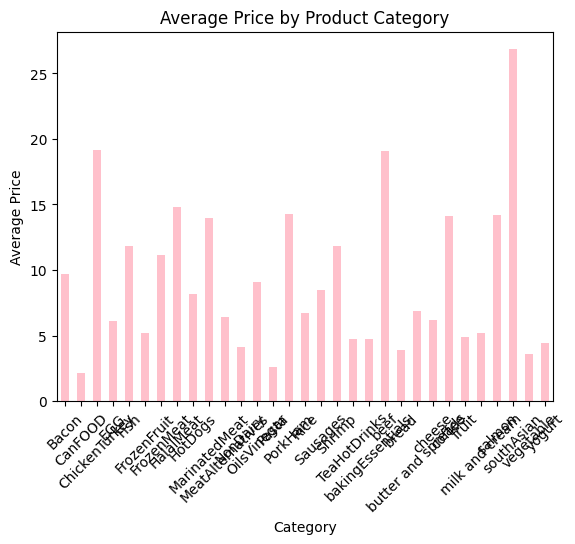

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'product' DataFrame is already loaded
# Group by 'Category' and calculate mean price for simplicity
category_price = product.groupby('Category')['Price'].mean()

# Plotting
category_price.plot(kind='bar', color='pink')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Average Price by Product Category')
plt.xticks(rotation=45)  # Rotate category names for better readability
plt.show()


In [77]:
product[['Numeric Value', 'Unit']] = product['Quantity'].str.split(expand=True)
product.head(10)
print(product['Numeric Value'].dtype)
product['Numeric Value'] = pd.to_numeric(product['Numeric Value'], errors='coerce')

print(product['Numeric Value'].dtype)
product.head(10)


object
float64


,Title,Price,Category,Store,Price Per Kilo,Price per Unit,Quantity,Numeric Value,Unit
0,"Bananas, Bunch",1.75,fruit,Superstore,1.52/1kg,$0.69/1lb,1.15 kg,1.15,kg
1,Strawberries 1LB,4.99,fruit,Superstore,NaN,$1.10/100g,454 g,454.00,g
2,Red Cherries,5.77,fruit,Superstore,6.48/1kg,$2.94/1lb,0.89 kg,0.89,kg
3,Red Seedless Watermelon,4.94,fruit,Superstore,NaN,$4.94/1ea,1 ea,1.00,ea
4,Blueberries 1 pint,4.99,fruit,Superstore,NaN,$1.47/100g,340 g,340.00,g
5,"Avocados Bag, 5-Pack",6.99,fruit,Superstore,NaN,$1.40/1ea,1 ea,1.00,ea
6,Strawberries 2LB,8.99,fruit,Superstore,NaN,$0.99/100g,907 g,907.00,g
7,Lemon,0.99,fruit,Superstore,NaN,$0.99/1ea,1 ea,1.00,ea
8,Extra Large Green Seedless Grapes,11.89,fruit,Superstore,11.66/1kg,$5.29/1lb,1.02 kg,1.02,kg
9,Limes,0.99,fruit,Superstore,NaN,$0.99/1ea,1 ea,1.00,ea


In [78]:
def separate_quantities(row):
    if row['Unit'] == 'kg':
        # Convert kg to g and store in the 'Grams' column
        return pd.Series([row['Numeric Value'] * 1000, None])
    elif row['Unit'] == 'g':
        # Store grams directly in the 'Grams' column
        return pd.Series([row['Numeric Value'], None])
    elif row['Unit'] == 'ea':
        # Store counts in the 'Each' column
        return pd.Series([None, row['Numeric Value']])
    else:
        # Handle unexpected units
        return pd.Series([None, None])

# Applying the function and creating new columns for 'Grams' and 'Each'
product[['Grams', 'Each']] = product.apply(separate_quantities, axis=1)

# Dropping the original 'Quantity' column as it is no longer needed
product.drop('Quantity', axis=1, inplace=True)

# Display the updated DataFrame to check the first 10 rows
print(product.head(10))

                               Title  Price Category       Store  \
0                     Bananas, Bunch   1.75    fruit  Superstore   
1                   Strawberries 1LB   4.99    fruit  Superstore   
2                       Red Cherries   5.77    fruit  Superstore   
3            Red Seedless Watermelon   4.94    fruit  Superstore   
4                 Blueberries 1 pint   4.99    fruit  Superstore   
5               Avocados Bag, 5-Pack   6.99    fruit  Superstore   
6                   Strawberries 2LB   8.99    fruit  Superstore   
7                              Lemon   0.99    fruit  Superstore   
8  Extra Large Green Seedless Grapes  11.89    fruit  Superstore   
9                              Limes   0.99    fruit  Superstore   

  Price Per Kilo Price per Unit  Numeric Value Unit   Grams  Each  
0       1.52/1kg      $0.69/1lb           1.15   kg  1150.0   NaN  
1            NaN     $1.10/100g         454.00    g   454.0   NaN  
2       6.48/1kg      $2.94/1lb           0.89 

In [79]:
product.to_csv('/content/drive/MyDrive/AI4Good/Final Project/superstore_cleaned.csv')